Imports

In [9]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    average_precision_score
)

import matplotlib.pyplot as plt
import seaborn as sns


Load Data

In [10]:
data_path = "../data/processed/fraud_cleaned_featured.csv"
df = pd.read_csv(data_path)

df.head()


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country,hour_of_day,day_of_week,time_since_signup,transactions_per_user
0,247547,2015-06-28 03:00:34,2015-08-09 03:57:29,47,KIXYSVCHIPQBR,SEO,Safari,F,30,16778864,0,16778240.0,16779263.0,Australia,3,6,1008.948611,1
1,220737,2015-01-28 14:21:11,2015-02-11 20:28:28,15,PKYOWQKWGJNJI,SEO,Chrome,F,34,16842045,0,16809984.0,16842751.0,Thailand,20,2,342.121389,1
2,390400,2015-03-19 20:49:09,2015-04-11 23:41:23,44,LVCSXLISZHVUO,Ads,IE,M,29,16843656,0,16843264.0,16843775.0,China,23,5,554.870556,1
3,69592,2015-02-24 06:11:57,2015-05-23 16:40:14,55,UHAUHNXXUADJE,Direct,Chrome,F,30,16938732,0,16924672.0,16941055.0,China,16,5,2122.471389,1
4,174987,2015-07-07 12:58:11,2015-11-03 04:04:30,51,XPGPMOHIDRMGE,SEO,Chrome,F,37,16971984,0,16941056.0,16973823.0,Thailand,4,1,2847.105278,1


Target Variable Check

In [11]:
df['class'].value_counts(normalize=True)


class
0    0.905007
1    0.094993
Name: proportion, dtype: float64

Feature / Target Split

In [12]:
X = df.drop(columns=['class'])
y = df['class']


Stratified Train-Test Split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print("Train fraud ratio:", y_train.mean())
print("Test fraud ratio:", y_test.mean())


Train fraud ratio: 0.09499012737620505
Test fraud ratio: 0.09500580720092915


# 🧪 BASELINE MODEL — LOGISTIC REGRESSION

In [15]:
X.dtypes


user_id                     int64
signup_time                object
purchase_time              object
purchase_value              int64
device_id                  object
source                     object
browser                    object
sex                        object
age                         int64
ip_address                  int64
lower_bound_ip_address    float64
upper_bound_ip_address    float64
country                    object
hour_of_day                 int64
day_of_week                 int64
time_since_signup         float64
transactions_per_user       int64
dtype: object

In [16]:
X = X.select_dtypes(include=[np.number])

X.head()


,user_id,purchase_value,age,ip_address,lower_bound_ip_address,upper_bound_ip_address,hour_of_day,day_of_week,time_since_signup,transactions_per_user
0,247547,47,30,16778864,16778240.0,16779263.0,3,6,1008.948611,1
1,220737,15,34,16842045,16809984.0,16842751.0,20,2,342.121389,1
2,390400,44,29,16843656,16843264.0,16843775.0,23,5,554.870556,1
3,69592,55,30,16938732,16924672.0,16941055.0,16,5,2122.471389,1
4,174987,51,37,16971984,16941056.0,16973823.0,4,1,2847.105278,1


In [17]:
X.dtypes.unique()


array([dtype('int64'), dtype('float64')], dtype=object)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


Train Logistic Regression

In [19]:
lr = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    n_jobs=-1
)

lr.fit(X_train, y_train)



,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


Evaluate Logistic Regression

In [20]:
lr_probs = lr.predict_proba(X_test)[:, 1]
lr_preds = lr.predict(X_test)

print("F1 Score:", f1_score(y_test, lr_preds))
print("AUC-PR:", average_precision_score(y_test, lr_probs))


F1 Score: 0.2866824805150796
AUC-PR: 0.32135479156575936


Confusion Matrix (Logistic)

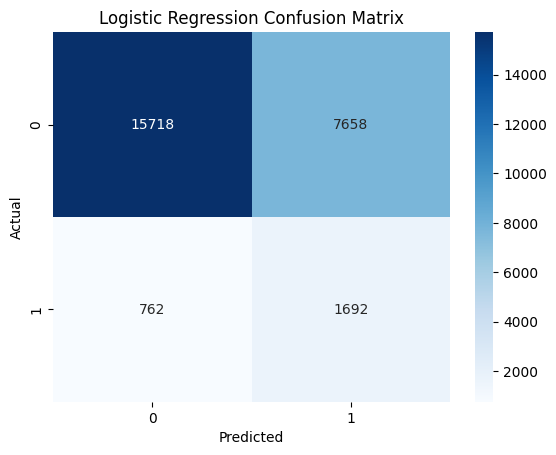

In [21]:
cm = confusion_matrix(y_test, lr_preds)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()


# 🌲 ENSEMBLE MODEL — RANDOM FOREST


🌲 ENSEMBLE MODEL — RANDOM FOREST

In [22]:
rf = RandomForestClassifier(
    n_estimators=50,
    max_depth=5,
    class_weight="balanced",
    n_jobs=-1,
    random_state=42
)

rf.fit(X_train, y_train)


,n_estimators,50
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Evaluate Random Forest

In [23]:
rf_probs = rf.predict_proba(X_test)[:, 1]
rf_preds = rf.predict(X_test)

print("F1 Score:", f1_score(y_test, rf_preds))
print("AUC-PR:", average_precision_score(y_test, rf_probs))


F1 Score: 0.706037437384656
AUC-PR: 0.6373743062172962


Confusion Matrix (RF)

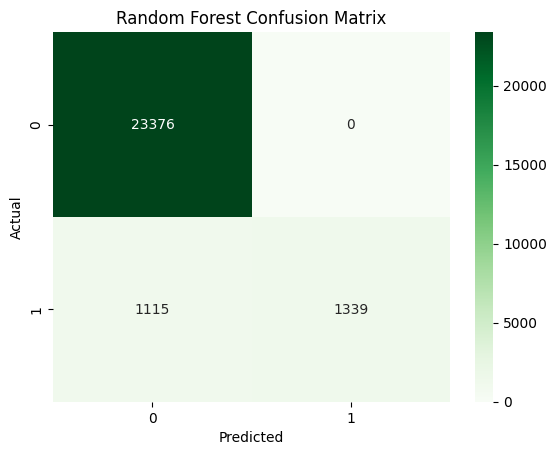

In [24]:
cm = confusion_matrix(y_test, rf_preds)

sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()


# CROSS-VALIDATION

Stratified K-Fold CV (Random Forest)

In [25]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

auc_scores = []
f1_scores = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
    print(f"Fold {fold}")

    X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]

    rf = RandomForestClassifier(
        n_estimators=50,
        max_depth=5,
        class_weight="balanced",
        n_jobs=-1,
        random_state=42
    )

    rf.fit(X_tr, y_tr)

    val_probs = rf.predict_proba(X_val)[:, 1]
    val_preds = rf.predict(X_val)

    auc_scores.append(average_precision_score(y_val, val_probs))
    f1_scores.append(f1_score(y_val, val_preds))

print("\nCV AUC-PR:", np.mean(auc_scores), "±", np.std(auc_scores))
print("CV F1:", np.mean(f1_scores), "±", np.std(f1_scores))


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5

CV AUC-PR: 0.6314349638780227 ± 0.006502653591808794
CV F1: 0.7025735857017198 ± 0.005717929217335838


# 📊 MODEL COMPARISON & SELECTION

Comparison Table

In [26]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "F1 Score": [
        f1_score(y_test, lr_preds),
        f1_score(y_test, rf_preds)
    ],
    "AUC-PR": [
        average_precision_score(y_test, lr_probs),
        average_precision_score(y_test, rf_probs)
    ]
})

results


,Model,F1 Score,AUC-PR
0,Logistic Regression,0.286682,0.321355
1,Random Forest,0.706037,0.637374


# Final Model Selection

Logistic Regression provides interpretability and serves as a strong baseline.
Random Forest improves recall and AUC-PR, capturing non-linear patterns in fraud behavior.

**Selected Model:** Random Forest  
**Reason:** Higher AUC-PR and F1-score while handling class imbalance effectively.


🔹 Logistic Regression Metrics

In [29]:
from sklearn.metrics import average_precision_score, f1_score

# Predictions
lr_proba = lr.predict_proba(X_test)[:, 1]
lr_pred = lr.predict(X_test)

# Metrics
lr_auc_pr = average_precision_score(y_test, lr_proba)
lr_f1 = f1_score(y_test, lr_pred)

lr_auc_pr, lr_f1


(0.32135479156575936, 0.2866824805150796)

Random Forest Metrics

In [30]:
# Predictions
rf_proba = rf.predict_proba(X_test)[:, 1]
rf_pred = rf.predict(X_test)

# Metrics
rf_auc_pr = average_precision_score(y_test, rf_proba)
rf_f1 = f1_score(y_test, rf_pred)

rf_auc_pr, rf_f1


(0.6502987905266975, 0.706037437384656)

Model Comparison Table

In [31]:
import pandas as pd

comparison_df = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "Random Forest"
    ],
    "AUC-PR": [
        lr_auc_pr,     # Average Precision score for Logistic Regression
        rf_auc_pr      # Average Precision score for Random Forest
    ],
    "F1-Score": [
        lr_f1,
        rf_f1
    ]
})

comparison_df


,Model,AUC-PR,F1-Score
0,Logistic Regression,0.321355,0.286682
1,Random Forest,0.650299,0.706037
